HOUSE_PRICE_PREDICTION. (ADVANCED REGRESSION)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [347]:
#import relevant libraries
import numpy as np
import pandas as pd
# for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# for preprocessing the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# this help us to do advance regression with data set and apply Machine Learning algoithm 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

Now we are going to to load our training and testing data set and we first aanalyze both data set about what the actual situation is their with house pricing...........

In [348]:
# load the trainng and test data set with pandas ..
train_data=pd.read_csv('/content/drive/MyDrive/PROJECTS FILES/Kaggle Project files/House price prediction/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/PROJECTS FILES/Kaggle Project files/House price prediction/test.csv')
sam_sub=pd.read_csv('/content/drive/MyDrive/PROJECTS FILES/Kaggle Project files/House price prediction/sample_submission.csv')

We succesfully load the data set of train , test , sample_submission and we are going to analyze data set.....

In [349]:
# check the  shape of both data set
train_data.shape , test_data.shape

((1460, 81), (1459, 80))

In [350]:
# check the data with frist five sets
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [351]:
# check the data with frist five sets
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [352]:
# understand the dtype and  information of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [353]:
# understand the dtype and  information of data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [354]:
# Missing value train
train_null=train_data.isnull().sum()/train_data.count()*100
value_train=pd.DataFrame({'value':train_null})
value1=value_train[value_train['value']>30]
value1.index
value1=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [355]:
# Missing value test
test_null=test_data.isnull().sum()/test_data.count()*100
value_test=pd.DataFrame({'value':test_null})
value2=value_test[value_test['value']>30]
value2.index
value2=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [356]:
# dropping train_data null value
train_data.drop(value1,axis=1,inplace=True)

In [357]:
train_data.shape

(1460, 76)

In [358]:
# dropping test_data null value
test_data.drop(value2,axis=1,inplace=True)

In [359]:
test_data.shape

(1459, 75)

In [360]:
# checking null vale less than 30% test_data
train_fill=value[value['value']!=0].index
train_fill

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [361]:
# checking null vale less than 30% train_data
test_fill=value[value['value']!=0].index
test_fill

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [362]:
# extract the int and object from train_data
train_int=[]
train_obj=[]
for i in train_fill:
  if train_data[i].dtype=='int':
    train_int.append(i)
  if train_data[i].dtype=='object':
    train_obj.append(i)

In [363]:
# filling the missing value of int and obj value train
for i in train_int:
  train_data.fillna(train_data[i].mean,axis=0,inplace=True)

In [364]:
# filling the missing value of int and obj value train
for i in train_obj:
  train_data.fillna(train_data[i].mode,axis=0,inplace=True)

In [365]:
# extract the int and object from test_data
test_int=[]
test_obj=[]
for i in test_fill:
  if test_data[i].dtype=='int':
    test_int.append(i)
  if test_data[i].dtype=='object':
    test_obj.append(i)

In [366]:
# filling the missing value of int and obj value test
for i in test_int:
  test_data.fillna(test_data[i].mean,axis=0,inplace=True)

In [367]:
# filling the missing value of int and obj value train
for i in train_obj:
  test_data.fillna(test_data[i].mode,axis=0,inplace=True)

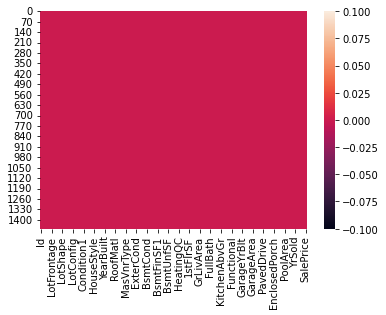

In [368]:
sns.heatmap(train_data.isnull())

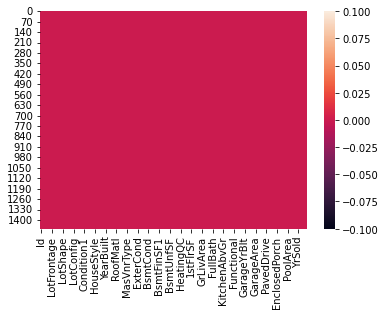

In [369]:
sns.heatmap(test_data.isnull())

we removed null value from train and test data succesfully :

In [370]:
#checkpoint 1
train_data=train_data.copy()
test_data=test_data.copy()

In [371]:
train_data.shape, test_data.shape

((1460, 76), (1459, 75))

In [372]:
# encode the categorical value train
train_cat=[]
for i in train_data.columns:
  if train_data[i].dtype=='object':
    train_cat.append(i)

In [373]:
# encode the categorical value test
test_cat=[]
for i in test_data.columns:
  if test_data[i].dtype=='object':
    test_cat.append(i)

In [374]:
le=LabelEncoder()# label encoder

In [375]:
# encode the train_cat
for i in train_cat:
  train_data[i]=train_data[i].astype(str)
  train_data[i]=le.fit_transform(train_data[i])

In [376]:
# encode the test_cat
for i in test_cat:
  test_data[i]=test_data[i].astype(str)
  test_data[i]=le.fit_transform(test_data[i])

We succesfully Encode the train categorical and test _categorical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


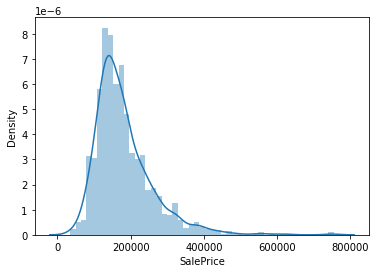

In [377]:
# checking skew of the sales price 
sns.distplot(train_data['SalePrice'])

Now its time to Scale the data for the equal format  :

In [378]:
# libraries for scaling 
from sklearn.preprocessing import StandardScaler

In [379]:
#scale
ss=StandardScaler()

In [380]:
# scaling training data
scale=ss.fit(train_data)
train_scaled=scale.transform(train_data)

In [381]:
# scaling test data
scale=ss.fit(test_data)
test_scaled=scale.transform(test_data)

In [382]:
train_df=pd.DataFrame(train_scaled,columns=train_data.columns)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,-0.094172,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.477754,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,0.020213,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,-0.284814,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.630268,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843


In [383]:
test_df=pd.DataFrame(test_scaled,columns=test_data.columns)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730864,-0.874711,-1.419926,0.536966,0.363929,0.06426,0.742620,0.31870,0.03705,0.572445,...,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.325555,0.201383
1,-1.728490,-0.874711,-0.022037,0.574109,0.897861,0.06426,-1.384637,0.31870,0.03705,-1.950811,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.325555,0.201383
2,-1.726115,0.061351,-0.022037,0.314104,0.809646,0.06426,-1.384637,0.31870,0.03705,0.572445,...,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.325555,0.201383
3,-1.723741,0.061351,-0.022037,0.462679,0.032064,0.06426,-1.384637,0.31870,0.03705,0.572445,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.325555,0.201383
4,-1.721367,1.465443,-0.022037,-0.837348,-0.971808,0.06426,-1.384637,-2.53396,0.03705,0.572445,...,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0.325555,0.201383


Succesfully scaled the train and test data lets processd the futhur process

Now its time to split the data into  train and test

In [384]:
# splitting data into train and test.     ---- only for train 
X=train_data.iloc[:,:-1]
Y=train_data.iloc[:,-1]

In [385]:
# librarries for data 
from sklearn.model_selection import train_test_split

In [386]:
# here we split data into train and test 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,shuffle=True)

In [387]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1168, 75), (292, 75), (1168,), (292,))

Now we good to go with Model Building 

In [388]:
lr=LinearRegression()

In [389]:
# Fit data into model
model_fit=lr.fit(x_train,y_train)

In [390]:
# test the data
model_pred=model_fit.predict(x_test)

In [391]:
# score of model
mod_score=model_fit.score(x_test,y_test)
print("Model Accuracy : ",(mod_score*100).round(2),"%")

Model Accuracy :  84.9 %


Linear model accurcy of our data set is. "84.93%" which is good  

Now check with the Large test data set of model  accuracy

Checking the model score with large  test data set

Now check the dataset with diffrent model 

In [392]:
dtc=tree.DecisionTreeRegressor()

In [393]:
dtc_fit=dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)

In [394]:
dtc_score=dtc_fit.score(x_test,y_test)

In [395]:
# DTC score
print("Decision tree score : ",(dtc_score*100).round(2),"%")

Decision tree score :  80.16 %


Now this data frane is result of linear result

In [396]:
# data set of the Linear model
liner_df=pd.DataFrame({'ID':x_test['Id'],'SalesPrediction':model_pred})
liner_df

,ID,SalesPrediction
892,893,154911.936706
1105,1106,317880.271373
413,414,114185.197474
522,523,178843.006970
1036,1037,320976.540218
...,...,...
479,480,119107.818114
1361,1362,289382.289954
802,803,216408.754541
651,652,118681.071593


Now this data frane is result of Decision tree result

In [397]:
# data set of the  decsion tree regressormodel
dtc_df=pd.DataFrame({'ID':x_test['Id'],'SalesPrediction':dtc_pred})
dtc_df

,ID,SalesPrediction
892,893,154000.0
1105,1106,381000.0
413,414,110500.0
522,523,210000.0
1036,1037,374000.0
...,...,...
479,480,120500.0
1361,1362,213000.0
802,803,184000.0
651,652,172500.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


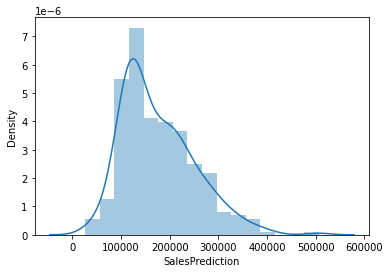

In [398]:
# linear Sales prediction 
sns.distplot(liner_df['SalesPrediction'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


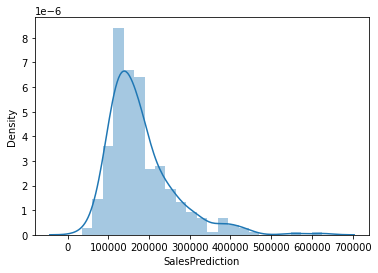

In [399]:
# DTC Sales Prediction
sns.distplot(dtc_df['SalesPrediction'])

In [400]:
# test moel predict ( linear moedl)
linear_test_pred=model_fit.predict(test_data)
# test model  predict (Decision tree)
dtc_test_pred=dtc.predict(test_data)

In [401]:
# test data linear data frame (linear)
linear_test=pd.DataFrame({'ID':test_data['Id'],'SalesPrediction':linear_test_pred})
# test data dtc data frame(Decision tree)
dtc_test=linear_test=pd.DataFrame({'ID':test_data['Id'],'SalesPrediction':dtc_test_pred})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


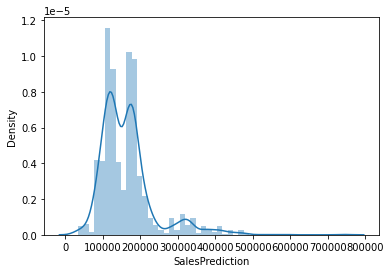

In [402]:
# graph
sns.distplot(linear_test['SalesPrediction'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


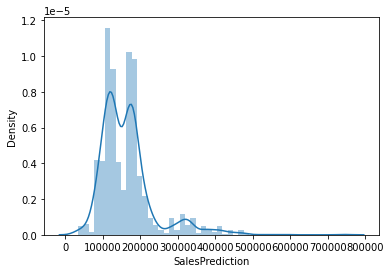

In [403]:
# graph
sns.distplot(dtc_test['SalesPrediction'])